In [3]:
import illustris_python as il

basePath = '/Users/TaraD/TNG-100_3/outputs' #Folder with snapshots and group catalogs
snapshot_ind = 66

# Loading header file
header = il.groupcat.loadHeader(basePath, snapshot_ind)
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("Header File Keys: ")
print('\n'.join(list(header.keys())))

# Loading halo group quantities 
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("\nHalo Group File Keys: ")
print('\n'.join(list(halo_grp.keys())))

# You can also specify the fields when loading halos to load what you want
#halo_grp_fields = ['GroupCM', 'GroupMass', 'Group_R_Crit200', 'Group_R_Mean200']
#halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind, fields=halo_grp_fields)
#print('\nHalo Group FIle Keys w Specified Fields:')
#print('\n'.join(list(halo_grp.keys())))

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
print("\nSubHalo Group File Keys: ")
print('\n'.join(list(subhalo_grp.keys())))

Header File Keys: 
Ngroups_ThisFile
Nsubgroups_ThisFile
Nids_ThisFile
Ngroups_Total
Nsubgroups_Total
Nids_Total
NumFiles
Time
Redshift
HubbleParam
BoxSize
Omega0
OmegaLambda
FlagDoubleprecision
Git_commit
Git_date

Halo Group File Keys: 
count
GroupBHMass
GroupBHMdot
GroupCM
GroupFirstSub
GroupGasMetalFractions
GroupGasMetallicity
GroupLen
GroupLenType
GroupMass
GroupMassType
GroupNsubs
GroupPos
GroupSFR
GroupStarMetalFractions
GroupStarMetallicity
GroupVel
GroupWindMass
Group_M_Crit200
Group_M_Crit500
Group_M_Mean200
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit500
Group_R_Mean200
Group_R_TopHat200

SubHalo Group File Keys: 
count
SubhaloBHMass
SubhaloBHMdot
SubhaloCM
SubhaloFlag
SubhaloGasMetalFractions
SubhaloGasMetalFractionsHalfRad
SubhaloGasMetalFractionsMaxRad
SubhaloGasMetalFractionsSfr
SubhaloGasMetalFractionsSfrWeighted
SubhaloGasMetallicity
SubhaloGasMetallicityHalfRad
SubhaloGasMetallicityMaxRad
SubhaloGasMetallicitySfr
SubhaloGasMetallicitySfrWeighted
SubhaloGrNr
SubhaloH

<Figure size 432x288 with 0 Axes>

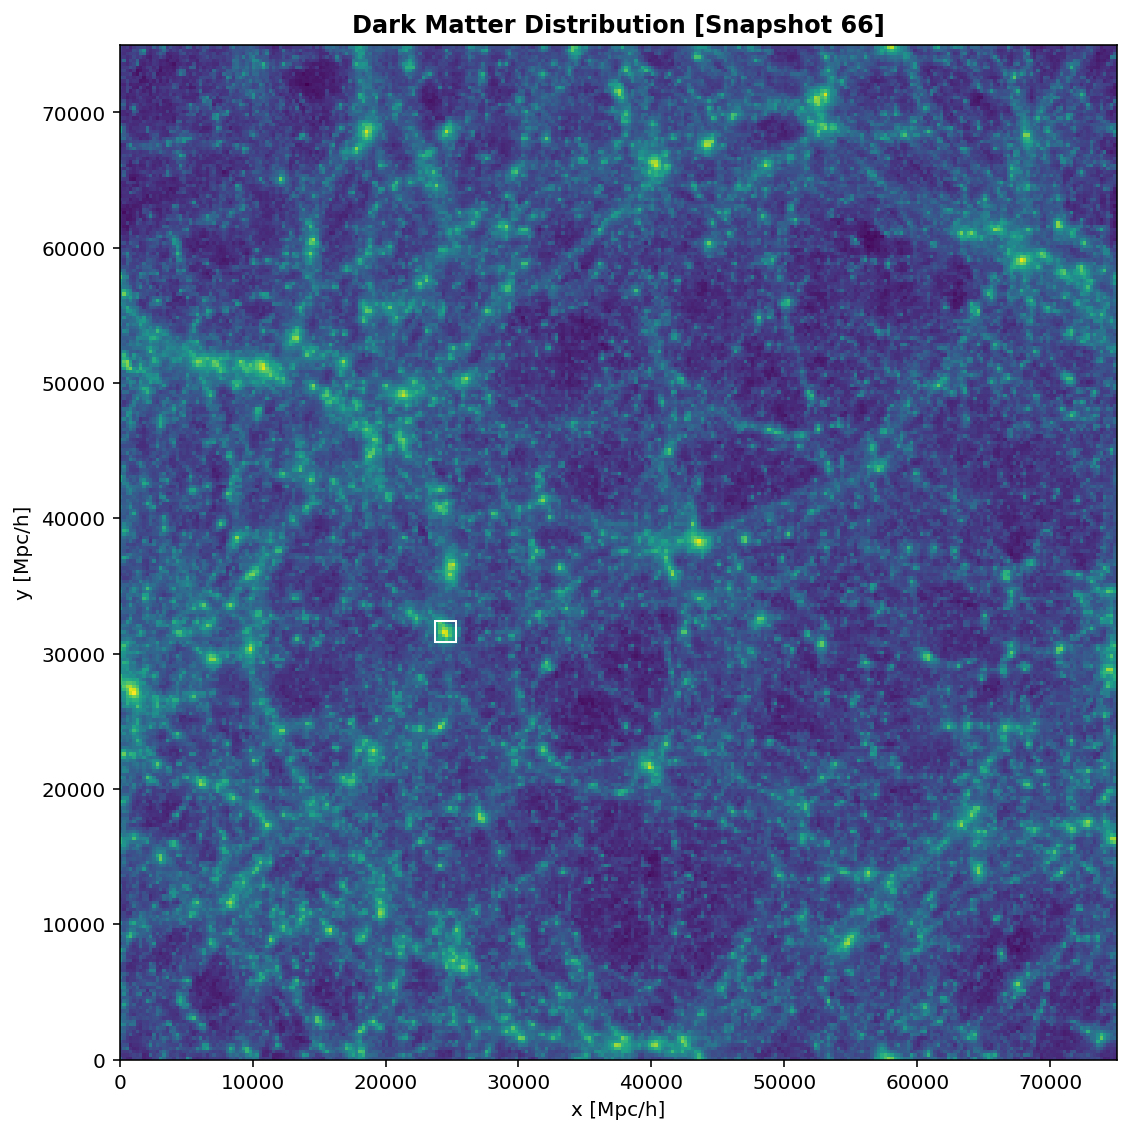

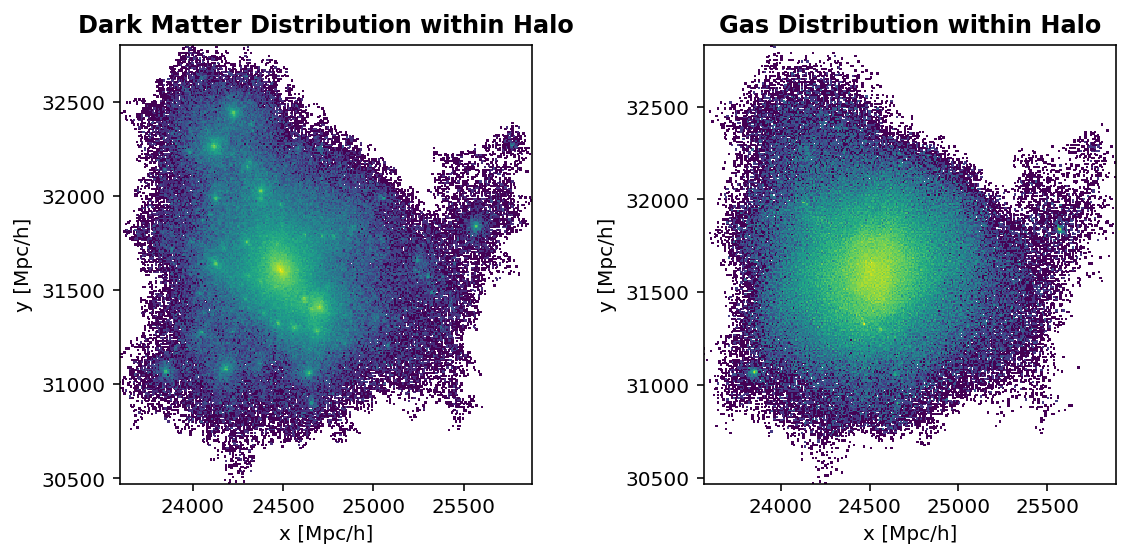

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
plt.rcParams['figure.facecolor'] = 'w'


%config InlineBackend.figure_format ='retina' #Making higher res

# Choose index of halo to analze (sorted by increasing mass)
halo_ind = 3 
assert(halo_ind >= 0 and halo_ind < halo_grp['count']) 

halo_cm = halo_grp['GroupCM'][halo_ind]
halo_gas = il.snapshot.loadHalo(basePath, snapshot_ind, halo_ind, 'gas')
halo_dm = il.snapshot.loadHalo(basePath, snapshot_ind, halo_ind,'dm')

dm_pos = il.snapshot.loadSubset(basePath, snapshot_ind, 'dm', ['Coordinates'])
halo_gas_pos = halo_gas['Coordinates']
halo_dm_pos = halo_dm['Coordinates']
halo_R_Mean200 = halo_grp['Group_R_Mean200'][snapshot_ind]

# Plot dark matter distribution
plt.figure(1)
plt.figure(figsize=(8, 8))
plt.hist2d(dm_pos[:,0], dm_pos[:,1], norm=colors.LogNorm(), bins=300)

# Plot box around selected halo
rec = plt.Rectangle((halo_cm[0]-1.5*halo_R_Mean200, halo_cm[1]-1.5*halo_R_Mean200), 
                    3*halo_R_Mean200, 3*halo_R_Mean200, ec="white", fill=None)
plt.gca().add_patch(rec)

plt.xlim(np.array([0,75000]))
plt.ylim(np.array([0,75000]))
plt.xlabel('x [Mpc/h]')
plt.ylabel('y [Mpc/h]')
plt.title("Dark Matter Distribution [Snapshot 66]", fontweight="bold")
plt.tight_layout()

# Plot gas and dark matter particle distributions within second halo
plt.figure(2)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist2d(halo_dm_pos[:,0], halo_dm_pos[:,1], norm=colors.LogNorm(), bins=300)
plt.xlabel('x [Mpc/h]')
plt.ylabel('y [Mpc/h]')
plt.title("Dark Matter Distribution within Halo", fontweight="bold")

plt.subplot(1,2,2)
plt.hist2d(halo_gas_pos[:,0], halo_gas_pos[:,1], norm=colors.LogNorm(), bins=300)
plt.xlabel('x [Mpc/h]')
plt.ylabel('y [Mpc/h]')
plt.title("Gas Distribution within Halo", fontweight="bold")

plt.tight_layout()

138061


Text(0, 0.5, 'Number of Clusters')

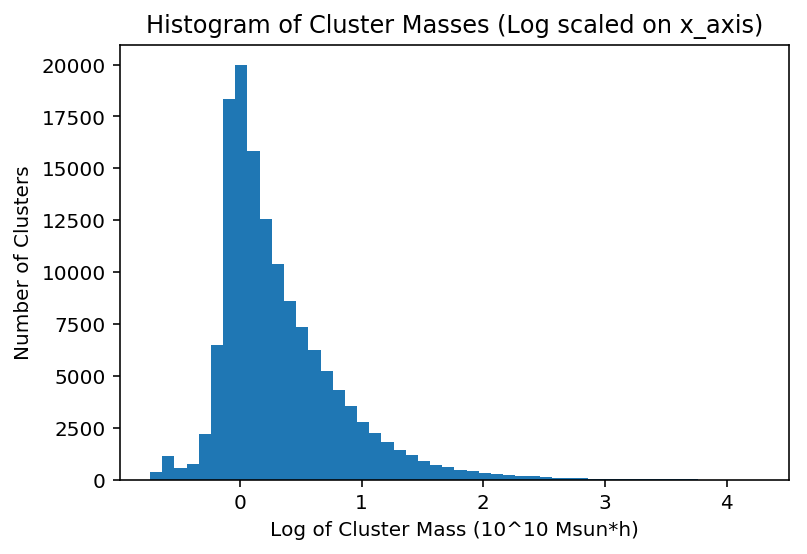

In [124]:
print(halo_grp['count'])
Cluster_masses = []
for i in range((halo_grp['count'])):
    Cluster_masses.append(halo_grp['GroupMass'][i])
    #print(halo_grp['GroupMass'][i])
#print(Cluster_masses[50])
plt.hist((np.log10(Cluster_masses)), bins=50)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('Histogram of Cluster Masses (Log scaled on x_axis)')
plt.xlabel('Log of Cluster Mass (10^10 Msun*h)')
plt.ylabel('Number of Clusters')

Count of subhalos: 131761
Number of Total groups in Snapshot: 138061
Number of Total subgroups in Snapshot: 131761
Halos with subhalos: 109630
Halos with more than 5 subhalos: 792
Subhalos not flagged and with DM mass > 10^11: 987
Number of halos with mass > 10^13 Msun: 143


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWa

Text(0, 0.5, 'Number of Clusters (Log Scaled)')

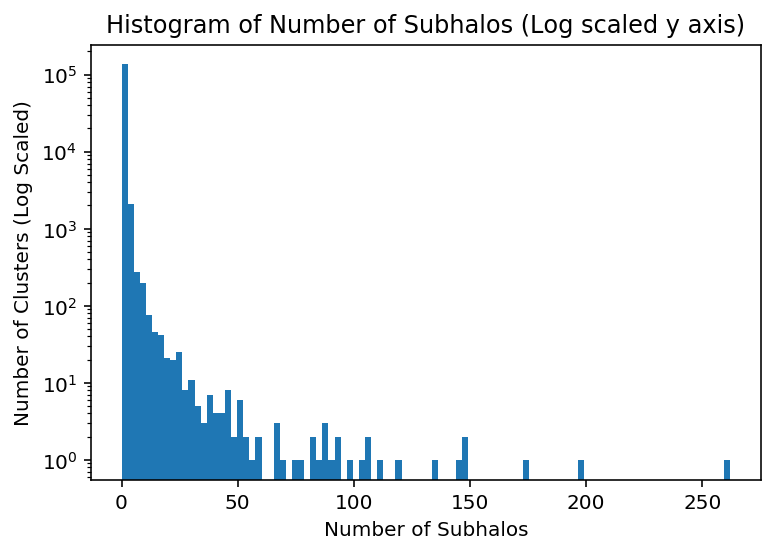

In [128]:
print("Count of subhalos:",subhalo_grp['count'])
#print(subhalo_grp['SubhaloGrNr'][130000:130030])
print("Number of Total groups in Snapshot:", header['Ngroups_Total'])
print("Number of Total subgroups in Snapshot:", header['Nsubgroups_Total'])
grp_first_sub = halo_grp['GroupFirstSub']
mask = [grp_first_sub != -1]
print("Halos with subhalos:",len(grp_first_sub[mask]))
print("Halos with more than 5 subhalos:", len(halo_grp['GroupNsubs'][halo_grp['GroupNsubs']>5]))
#print(halo_grp['GroupNsubs'][100000:100050])
mask_flag = [subhalo_grp['SubhaloFlag'] == True]
subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
mask_dmmass = [subhalomass>11]
print("Subhalos not flagged and with DM mass > 10^11:", len((subhalo_grp['SubhaloFlag'])[mask_flag and mask_dmmass]))
#print((subhalo_grp['SubhaloFlag'])[mask_flag])
mask_halomass = [(halo_grp['GroupMass'])>(10**3)]
print("Number of halos with mass > 10^13 Msun:", len(halo_grp['GroupMass'][mask_halomass]))

#Histogram of number of subhalos
x = halo_grp['GroupNsubs']#[halo_grp['GroupNsubs']>0]
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist((x), bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('Histogram of Number of Subhalos (Log scaled y axis)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')




Halo 3 # of Subhalos: 149
Halo 3 Mass: 12653.349
Index of first subhalo: 635
3
149


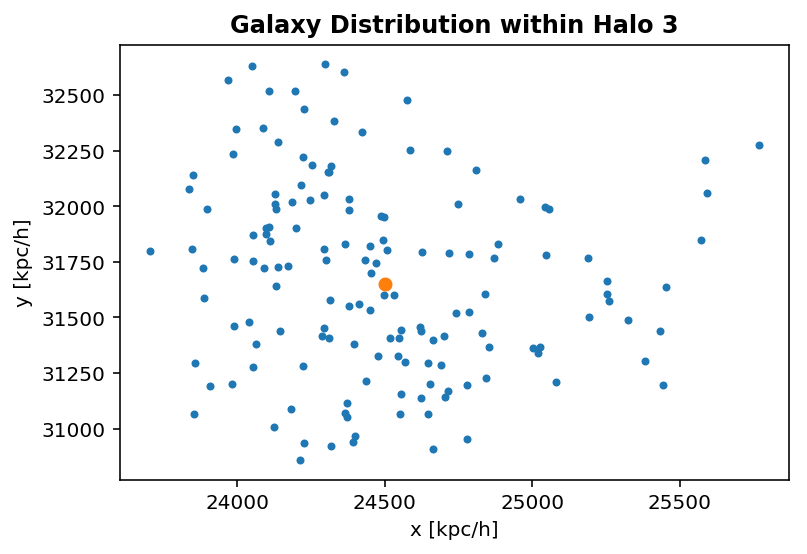

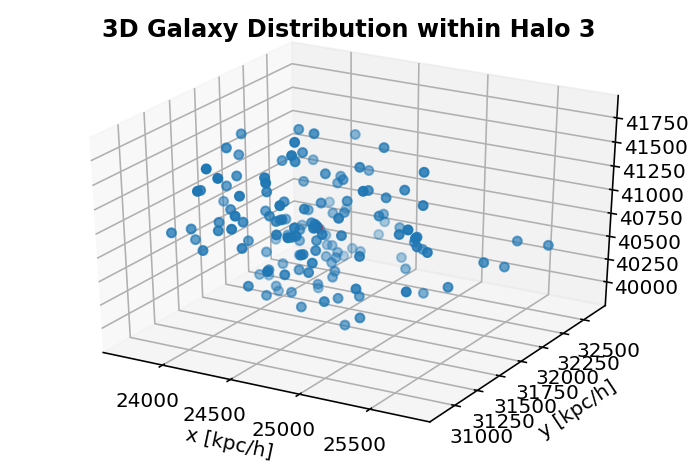

(149, 3)
(149,)
671.44543
107.09554681396484 4 1.0692481028105118e-07
307.85773175048826 17 6.866453141308236e-08
508.61991668701165 29 4.386489275557809e-08
709.382101623535 41 3.208060395292642e-08
910.1442865600585 34 1.6203515846272697e-08
1110.906471496582 19 6.0859229629477375e-09
1311.6686564331053 4 9.197565927614174e-10
1512.430841369629 1 1.7302941570570612e-10
1713.1930263061522 0 0.0
1913.955211242676 0 0.0
149


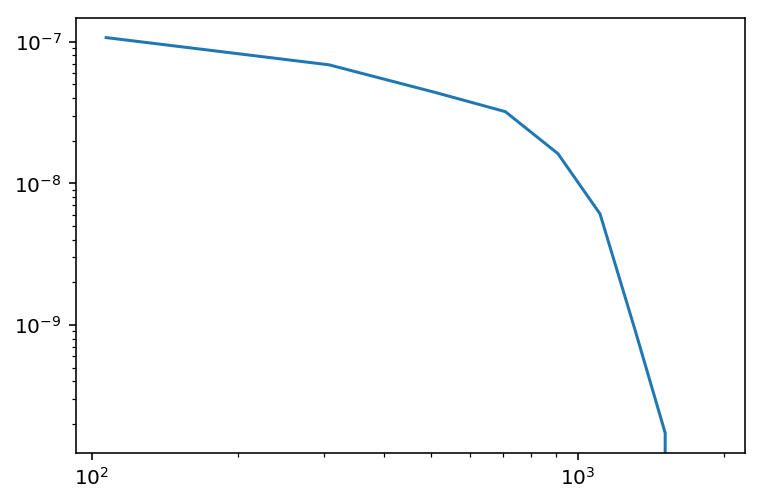

In [205]:
from mpl_toolkits.mplot3d import Axes3D


# Picked halo 3
h_i = 3
print("Halo 3 # of Subhalos:", halo_grp['GroupNsubs'][h_i])
print("Halo 3 Mass:", halo_grp['GroupMass'][h_i])

print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
print(subhalo_grp['SubhaloGrNr'][635]) #635-783 is halo 3 in subhalo catalog

N_subhalos = halo_grp['GroupNsubs'][h_i]
#iFS = halo_grp['GroupFirstSub'][h_i] #index of First Sub
#iLS = indexFirstSub + N_subhalos - 1  #index of Last Sub
#print(iFS)
#print(iLS)

# getting subhalos of halo 3:
# HAVE TO MASK FOR MASS OF SUBHALO TOO
mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
#mask = [subhalo_grp['SubhaloFlag']==True]
print(len(subhalo_grp['SubhaloGrNr'][mask]))
#print(subhalo_grp['SubhaloFlag'][635:783])

# COORDINATES
CM_coords = subhalo_grp['SubhaloCM'][mask]
CM_halo = halo_grp['GroupCM'][h_i]

# PLOTTING HALO
plt.plot(CM_coords[:,0], CM_coords[:,1], '.')#, norm=colors.LogNorm(), bins=300)
plt.plot(CM_halo[0], CM_halo[1], 'o')
plt.xlabel('x [kpc/h]')
plt.ylabel('y [kpc/h]')
plt.title("Galaxy Distribution within Halo 3", fontweight="bold")

fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(CM_coords[:,0], CM_coords[:,1], CM_coords[:,2], marker='o')
ax.scatter(CM_halo[0], CM_halo[1], CM_halo[2], c='r',marker='o')
plt.xlabel('x [kpc/h]')
plt.ylabel('y [kpc/h]')
#plt.zlabel('z [Mpc/h]')
plt.title("3D Galaxy Distribution within Halo 3", fontweight="bold")
plt.show()

# MAKING PROFILE
r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
#print(r_subhalo)
print(np.shape(CM_coords))
print(np.shape(r_subhalo))

R500c = halo_grp['Group_R_Crit500'][h_i]
print(R500c)
bins = 10
bin_edge = np.linspace(.01*R500c, 3*R500c, num=bins+1)
bin_min = bin_edge[:-1]
bin_max = bin_edge[1:]

NDensity = []
galaxies = []
for i in range(0,bins):
    mask_sep = (r_subhalo >=bin_min[i])*(r_subhalo < bin_max[i])
    r_masked = r_subhalo[mask_sep]
    number = len(r_masked)
    delta_r = bin_max[i] - bin_min[i]
    volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
    density = number/volume
    r = (bin_min[i] + bin_max[i])/2
    galaxies.append(number)
    NDensity.append(density)
    print(r, number, density)
print(sum(galaxies))
r_shell = (bin_min + bin_max)/2
plt.plot(r_shell, NDensity)
plt.xscale('log')
plt.yscale('log')


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


Number of halos with mass > 10^13 Msun: 143
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 130 131 132 133 134 135 138 140 141 142 143 145 146 157]

Halo: 0
Halo # of Subhalos: 262
Halo Mass: 18425.676
Index of first subhalo: 0
0
N Subhalos: 262
N Subhalos after masking: 94
(94, 3)
(94,)
R500c 683.86816
85

Halo: 1
Halo # of Subhalos: 199
Halo Mass: 16519.57
Index of first subhalo: 262
1
N Subhalos: 199
N Subhalos after masking: 67
(67, 3)
(67,)
R500c 630.13354
67

Halo: 2
Halo # of Subhalos: 174
Halo Mass: 13701.894


N Subhalos after masking: 17
(17, 3)
(17,)
R500c 328.75485
17

Halo: 52
Halo # of Subhalos: 45
Halo Mass: 2267.8232
Index of first subhalo: 4205
52
N Subhalos: 45
N Subhalos after masking: 20
(20, 3)
(20,)
R500c 344.70462
18

Halo: 53
Halo # of Subhalos: 35
Halo Mass: 2453.6665
Index of first subhalo: 4250
53
N Subhalos: 35
N Subhalos after masking: 8
(8, 3)
(8,)
R500c 407.74255
8

Halo: 54
Halo # of Subhalos: 52
Halo Mass: 2382.0083
Index of first subhalo: 4285
54
N Subhalos: 52
N Subhalos after masking: 14
(14, 3)
(14,)
R500c 358.68542
14

Halo: 55
Halo # of Subhalos: 53
Halo Mass: 2373.0828
Index of first subhalo: 4337
55
N Subhalos: 53
N Subhalos after masking: 12
(12, 3)
(12,)
R500c 308.9444
12

Halo: 56
Halo # of Subhalos: 42
Halo Mass: 2163.787
Index of first subhalo: 4390
56
N Subhalos: 42
N Subhalos after masking: 15
(15, 3)
(15,)
R500c 330.47156
15

Halo: 57
Halo # of Subhalos: 38
Halo Mass: 2115.6946
Index of first subhalo: 4432
57
N Subhalos: 38
N Subhalos after masking: 12

N Subhalos after masking: 4
(4, 3)
(4,)
R500c 305.1459
4

Halo: 103
Halo # of Subhalos: 27
Halo Mass: 1234.5178
Index of first subhalo: 5752
103
N Subhalos: 27
N Subhalos after masking: 7
(7, 3)
(7,)
R500c 245.6488
7

Halo: 104
Halo # of Subhalos: 26
Halo Mass: 1310.993
Index of first subhalo: 5779
104
N Subhalos: 26
N Subhalos after masking: 12
(12, 3)
(12,)
R500c 247.583
12

Halo: 105
Halo # of Subhalos: 25
Halo Mass: 1267.8055
Index of first subhalo: 5805
105
N Subhalos: 25
N Subhalos after masking: 8
(8, 3)
(8,)
R500c 287.07028
8

Halo: 106
Halo # of Subhalos: 27
Halo Mass: 1258.9954
Index of first subhalo: 5830
106
N Subhalos: 27
N Subhalos after masking: 9
(9, 3)
(9,)
R500c 323.03452
9

Halo: 107
Halo # of Subhalos: 24
Halo Mass: 1301.0914
Index of first subhalo: 5857
107
N Subhalos: 24
N Subhalos after masking: 8
(8, 3)
(8,)
R500c 207.03436
8

Halo: 108
Halo # of Subhalos: 22
Halo Mass: 1157.8423
Index of first subhalo: 5881
108
N Subhalos: 22
N Subhalos after masking: 9
(9, 3)


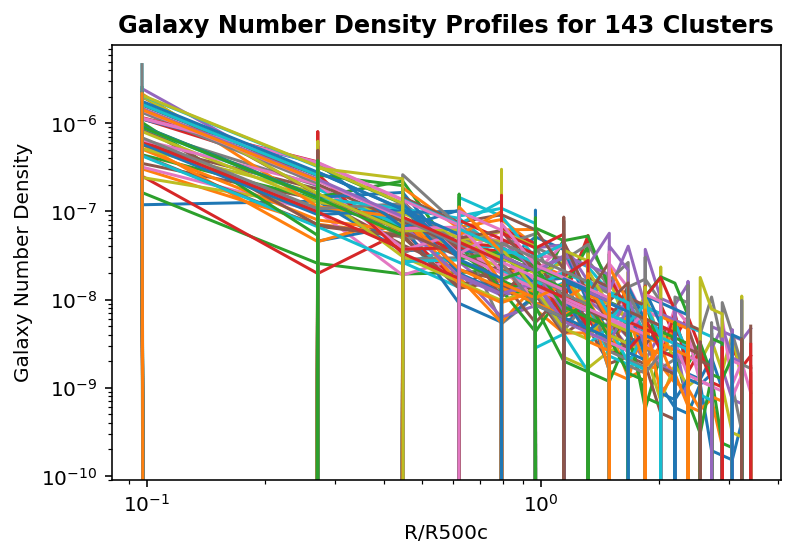

(10, 143)


Text(0.5, 1.0, 'Bootstrapped Stacked Galaxy Number Density Profiles of 143 Clusters')

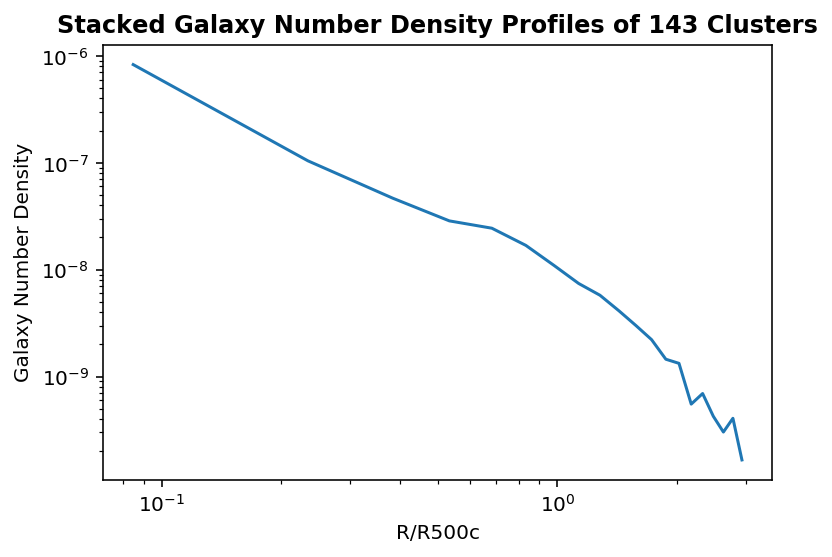

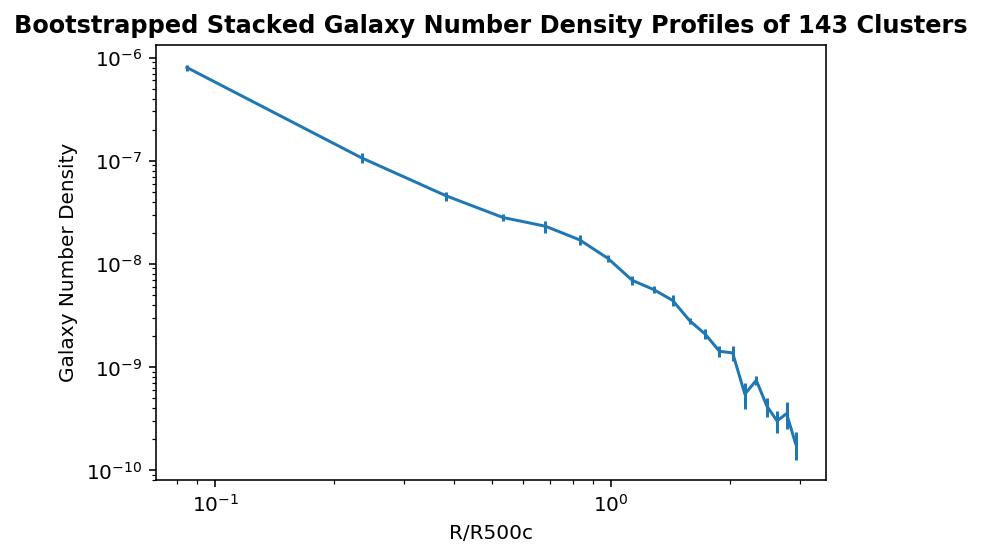

In [6]:
import astropy.stats as astats
plt.rcParams['figure.facecolor'] = 'w'
mask_halomass = [(halo_grp['GroupMass'])>=((10**3))]
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^13 Msun:", Number_of_halos)
halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]
print(halo_array_masked)
NDensity_list = []
ND_boot = []
for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo # of Subhalos:", halo_grp['GroupNsubs'][h_i])
    print("Halo Mass:", halo_grp['GroupMass'][h_i])

    print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
    iFS = halo_grp['GroupFirstSub'][h_i]
    print(subhalo_grp['SubhaloGrNr'][iFS]) #635-783 is halo  in subhalo catalog

    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # getting subhalos of halo 3:
    # HAVE TO MASK FOR MASS OF SUBHALO TOO?
    subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))

    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    submass_stellar = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)&(subhalomass>(10))#&(submass_stellar > 10**10)
    #mask = [subhalo_grp['SubhaloFlag']==True]
    print("N Subhalos after masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    #print(subhalo_grp['SubhaloFlag'][635:783])

    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask]
    CM_halo = halo_grp['GroupCM'][h_i]


    # MAKING PROFILE
    r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    #print(r_subhalo)
    print(np.shape(CM_coords))
    print(np.shape(r_subhalo))

    R500c = halo_grp['Group_R_Crit500'][h_i]
    print("R500c",R500c)
    bins = 20
    bin_edge = np.linspace(.01*R500c, 3.5*R500c, num=bins+1)
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    galaxies = []
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])*(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
    print(sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/R500c
    #print(r_stack)
    #bin_divided = np.linspace(.01,3,num=bins+1)
    #bin_stack = (bin_divided[1:]+bin_divided[:-1])/2
    #print(bin_stack)
    NDensity_list.append(NDensity)
    #plt.figure()
    plt.plot(r_stack, NDensity, '-')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R500c')
    plt.ylabel('Galaxy Number Density')
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')

plt.show()
NDensity_stack = np.mean(NDensity_list, axis=0)
halo_array2 = np.arange(0,Number_of_halos)
halo_boot = astats.bootstrap(halo_array2, bootnum=10, samples=None)
print(np.shape(halo_boot))
resampled_list = []
for b in range(0,10):
    mask_b = (np.array(halo_boot[b].astype(int)))
    #print(type(mask_b))
    #print(mask_b)
    #mask_b_list = []
    #for bi in mask_b:
        #mask_b_list.append(bi)
    #mask_b_array = np.array(mask_b_list)
            
    resampled_profile = np.mean((np.array(NDensity_list))[mask_b], axis=0)
    resampled_list.append(resampled_profile)
resampled_array = np.array(resampled_list)
ND_boot_stack = np.mean(resampled_array, axis=0)
ND_err = np.std(resampled_array, axis=0)

bin_divided = np.linspace(.01,3,num=bins+1)
bin_stack = (bin_divided[1:]+bin_divided[:-1])/2

plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R500c')
plt.ylabel('Galaxy Number Density')
plt.title('Stacked Galaxy Number Density Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold')

plt.figure()
plt.errorbar(bin_stack, ND_boot_stack, yerr = ND_err)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R500c')
plt.ylabel('Galaxy Number Density')
plt.title('Bootstrapped Stacked Galaxy Number Density Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold')


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


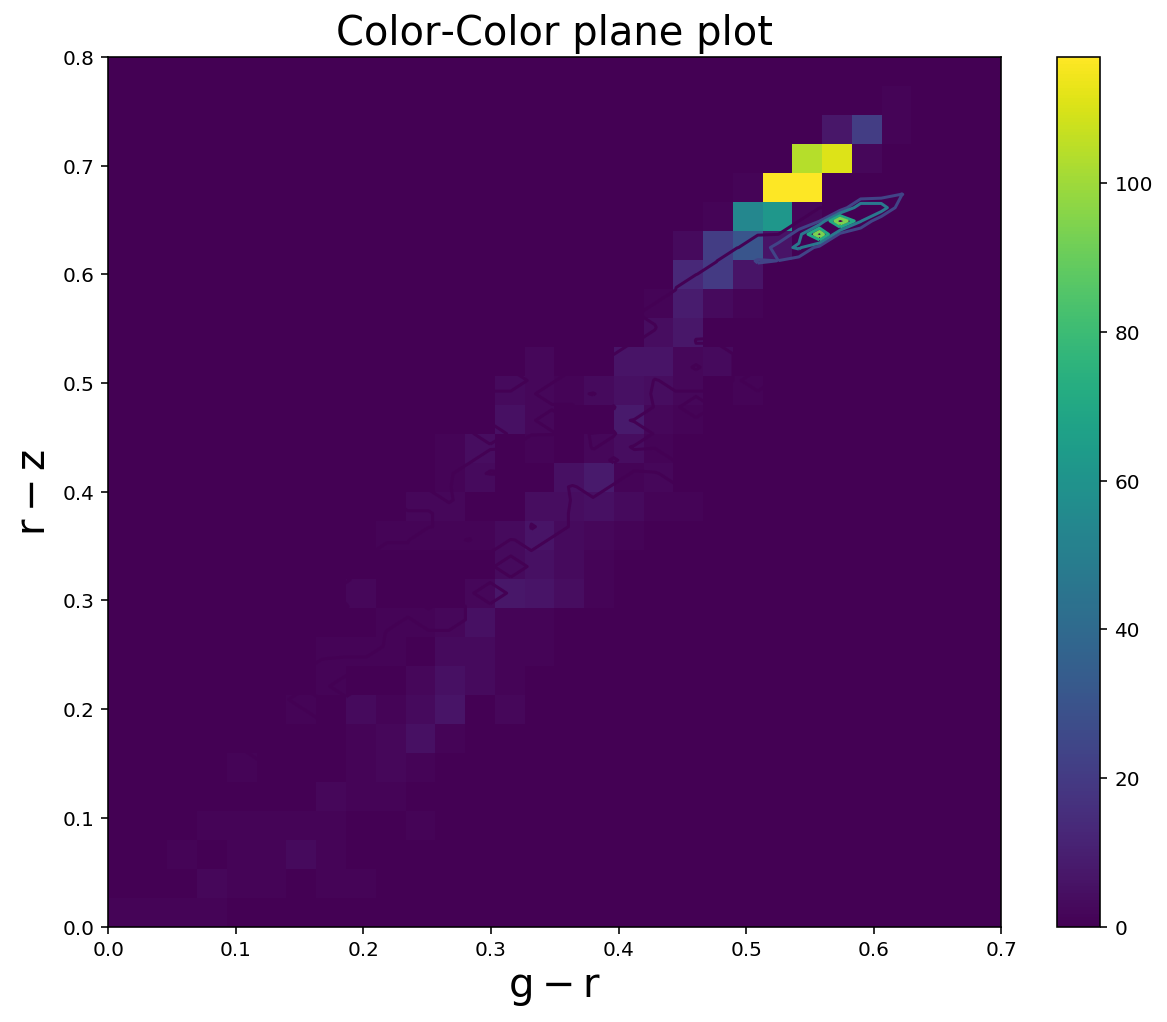

In [192]:
#colorspace comparison
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

#subhalomass = np.array(np.log10(subhalo_grp['SubhaloMassInRadType'][:,4]*1e10))
subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
flag = np.array(subhalo_grp['SubhaloFlag'])

mask= np.logical_and(flag,subhalomass>11)
mag = subhalo_grp['SubhaloStellarPhotometrics'][mask]
g_minus_r = mag[:,4]-mag[:,5]
r_minus_z = mag[:,5]-mag[:,7]


heights, gmr, rmz = np.histogram2d(g_minus_r,r_minus_z,bins=50)
plt.hist2d(r_minus_z, g_minus_r , bins = 30, cmap='viridis', range=[[0, 0.7], [0, 0.8]])#range=[[0.4, 0.7], [0.5, 0.8]])
plt.colorbar()

gmr = gmr - 3*0.026584281921386732
rmz = rmz + 3*0.02789093017578126
#levels = [0,2,10,20,40,60,80,100]
levels = np.linspace(0.2, 100,num=6)
ax.contour(gmr[0:50], rmz[0:50], heights, levels=levels) #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])

#ax.scatter(r_minus_z, g_minus_r, s=1)

ax.set_xlabel("$\mathrm{g-r}$", fontsize = 20)
ax.set_ylabel("$\mathrm{r-z}$", fontsize = 20)
ax.set_title("Color-Color plane plot", fontsize = 20)
plt.show()

In [272]:
test_array = np.array(([1,2,3],[4,5,6],[7,8,9]))
mask2 = np.array([1,2,0])#[2,3,4,5,6,7,8,0,1])
print(np.mean(test_array[mask2], axis=1))
mask1 = (test_array>4)&(test_array<9)&(test_array%2==0)
print(test_array[mask1])
subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'])*1e10))
submass_stellar = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
print(len(submass_stellar))


[5. 8. 2.]
[6 8]
131761
